# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Empty lists for data required
city_name = []
countries = []
lats = []
lngs = []
dates = []
max_temps = []
cloudinesses = []
humidities = []
wind_speeds = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | delta del tigre
Processing Record 6 of Set 1 | languyan
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | bansang
Processing Record 21 of Set 1 | kenora
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | clyde river
Processing Rec

Processing Record 37 of Set 4 | illapel
Processing Record 38 of Set 4 | ambon
Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | warwick
Processing Record 41 of Set 4 | sambava
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | okhotsk
Processing Record 45 of Set 4 | luoyang
Processing Record 46 of Set 4 | sibolga
Processing Record 47 of Set 4 | dhana
Processing Record 48 of Set 4 | tromso
Processing Record 49 of Set 4 | sooke
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | trairi
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | mutis
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | chapaevsk
Processing Record 9 of Set 5 | ruteng
Processing Record 10 of Set 5 | dali
Processing Record 11 of Set 5 | tigre
Processing Record 12 of Set 5 | kapit
City not found. Skipping...

Processing Record 25 of Set 8 | saravan
Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | port hawkesbury
Processing Record 28 of Set 8 | shelburne
Processing Record 29 of Set 8 | andra
Processing Record 30 of Set 8 | nishihara
Processing Record 31 of Set 8 | marzuq
Processing Record 32 of Set 8 | ivrea
Processing Record 33 of Set 8 | itubera
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | tombouctou
Processing Record 36 of Set 8 | libertador general san martin
Processing Record 37 of Set 8 | uspenka
Processing Record 38 of Set 8 | chardara
Processing Record 39 of Set 8 | tambo
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | beidao
Processing Record 42 of Set 8 | praia da vitoria
Processing Record 43 of Set 8 | sawakin
City not found. Skipping...
Processing Record 44 of Set 8 | camacha
Processing Record 45 of Set 8 | trenggalek
Processing Record 46 of Set 8 | celestun
City not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a Dictionary of values with Headers
weather_dict = {
    "City":city_name,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates }

In [8]:
# Create DF
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lata,40.16,-8.33,55.00,100,75,3.36,PT,1607530078
1,ushuaia,-54.80,-68.30,53.60,66,75,11.41,AR,1607529952
2,busselton,-33.65,115.33,63.00,84,0,1.01,AU,1607530078
3,soyo,-6.13,12.37,79.81,78,83,9.42,AO,1607530078
4,delta del tigre,5.50,6.00,83.35,75,100,5.82,NG,1607530078


In [10]:
# Export DF to csv
weather_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#Count Before

weather_df.count()

City          526
Lat           526
Lng           526
Max Temp      526
Humidity      526
Cloudiness    526
Wind Speed    526
Country       526
Date          526
dtype: int64

In [22]:
#  Get the indices of cities that have humidity over 100%.
HumidityPlus100 = weather_df['Humidity'] > 100

HumidityPlus100_df = weather_df[HumidityPlus100]
HumidityPlus100_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [23]:
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lata,40.16,-8.33,55.00,100,75,3.36,PT,1607530078
1,ushuaia,-54.80,-68.30,53.60,66,75,11.41,AR,1607529952
2,busselton,-33.65,115.33,63.00,84,0,1.01,AU,1607530078
3,soyo,-6.13,12.37,79.81,78,83,9.42,AO,1607530078
4,delta del tigre,5.50,6.00,83.35,75,100,5.82,NG,1607530078


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

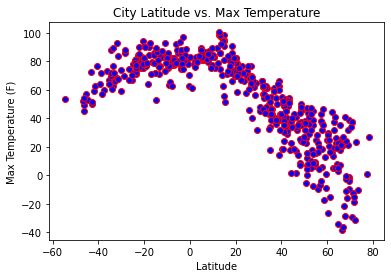

In [30]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="red",facecolors="blue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/LatvsTemp.png")
plt.show()

The plot above shows temperature plotted in relationship to city latitude.
As expected the further away from the equator the cooler the temperature.

## Latitude vs. Humidity Plot

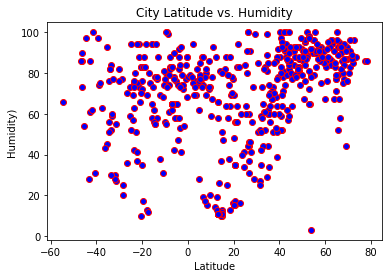

In [31]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="red",facecolors="blue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity)")
plt.savefig("output_data/LatvsHumidity.png")
plt.show()

The plot above shows humidity plotted in relationship to city latitude.
There is a fairly large cluster of high humidity as you move further away from the equator in the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

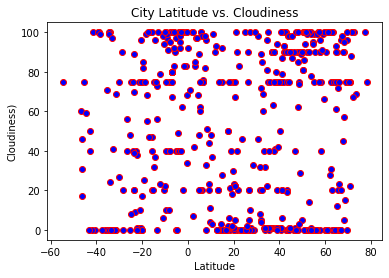

In [32]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="red",facecolors="blue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.savefig("output_data/LatvsCloud.png")
plt.show()

The plot above shows cloudiness plotted in relationship to city latitude.
There does not appear to be a relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

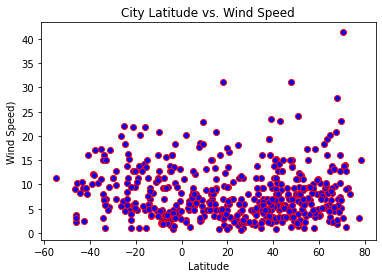

In [33]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="red",facecolors="blue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed)")
plt.savefig("output_data/LatvsWS.png")
plt.show()

The plot above shows wind speed plotted in relationship to city latitude.
There does not appear to be a relationship between latitude and wind speed.

## Linear Regression

In [37]:
# Create new dataframes for Northern and Southern Hemispheres

north_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.35x + 97.15
The r-squared is: -0.8745497024617048
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


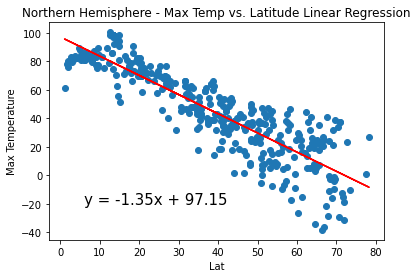

In [53]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("output_data/NHTVSLAT.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.46x + 84.96
The r-squared is: 0.5862600481407491
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


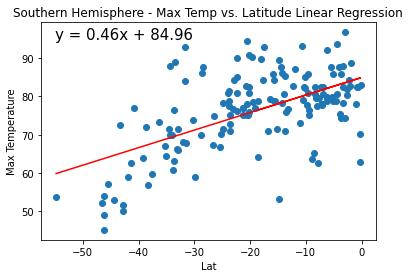

In [52]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("output_data/SHTVSLAT.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.62x + 47.04
The r-squared is: 0.5117891210091491
The regression does not display a strong correlation.


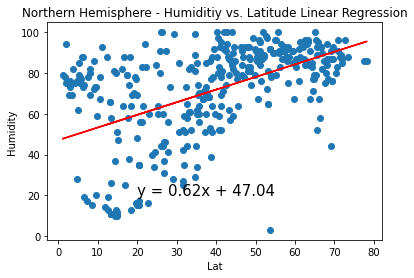

In [55]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humiditiy vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/NHHUMVSLAT.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.21x + 71.95
The r-squared is: 0.13608741038959285
The regression does not display a strong correlation.


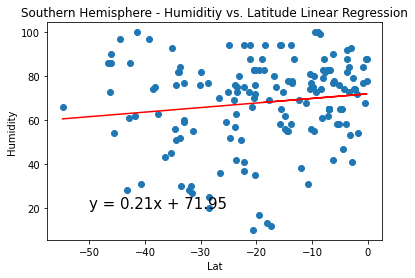

In [57]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humiditiy vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/SHHUMVSLAT.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 32.02
The r-squared is: 0.21532460387823213
The regression does not display a strong correlation.


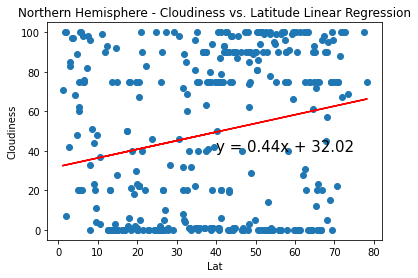

In [63]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/NHCLOUDVSLAT.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.94x + 73.18
The r-squared is: 0.3327479703007702
The regression does not display a strong correlation.


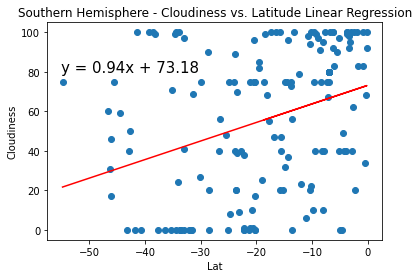

In [64]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/SHCLOUDVSLAT.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.83
The r-squared is: 0.09666581468075906
The regression does not display a strong correlation.


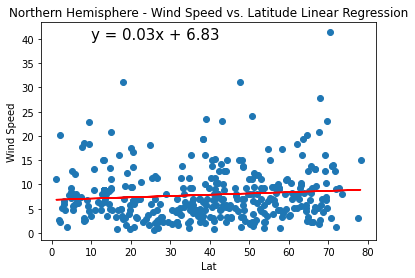

In [66]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/NHWSVSLAT.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 7.17
The r-squared is: -0.180857248475637
The regression does not display a strong correlation.


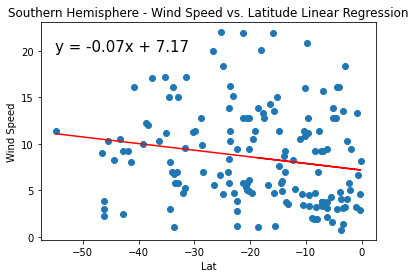

In [68]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="black")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a strong correlation.")
plt.savefig("output_data/SHWSVSLAT.png")
plt.show()